# Preparation

In [163]:
#dataload
from data_utils import load_CIFAR_batch,load_CIFAR10,get_CIFAR10_data
import sys
sys.path += ['layers']
import numpy as np
from init_layers import init_layers
from init_model import init_model
from train import train 
from test import test
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [164]:
X_train, y_train, X_test, y_test = get_CIFAR10_data()

Train data shape:  (32, 32, 3, 50000)
Train labels shape:  (50000,)
Test data shape:  (32, 32, 3, 10000)
Test labels shape:  (10000,)


# Model 1

## Structure

CONV(2, 3, 2)

POOL(2, 2)

RELU

FLATTEN

LINEAR(450, 10)

SOFTMAX

In [165]:
l1 = [init_layers('conv', {'filter_size': 2,
                        'filter_depth': 3,
                        'num_filters': 2}),
    init_layers('pool', {'filter_size': 2,
                        'stride': 2}),
    init_layers('relu', {}),
    init_layers('flatten', {}),
    init_layers('linear', {'num_in': 450,
                            'num_out': 10}),
    init_layers('softmax', {})]

model1 = init_model(l1, [32, 32, 3], 10, True)

Input size:
[32, 32, 3]
Layer 0 output size: 
(31, 31, 2)
Layer 1 output size: 
(15, 15, 2)
Layer 2 output size: 
(15, 15, 2)
Layer 3 output size: 
(450,)
Layer 4 output size: 
(10,)
Final output size:
(10,)
Provided output size (should match above):
10
(Batch dimension not included)


## Parameters

Learning Rate: 1e-3

Weight Decay: 1e-3

Batch Size: 128

In [166]:
numIters = 1500

params =  {"learning_rate":1e-3,
            "weight_decay":1e-3,
            "batch_size":128,
            "rho":0.99,
            "save_file":'model1_p1.npz',
            "print_step":10,
            "test_step":25}

model_result, train_accuracy, train_loss, test_accuracy, test_loss = train(model1, X_train, y_train, X_test, y_test, params, numIters=numIters)

Iteration:  10 	Train Accuracy:  0.078125 	Train Loss:  2.3358016934391124
Iteration:  20 	Train Accuracy:  0.125 	Train Loss:  2.295489681798285
Iteration:  25 	Test Accuracy:  0.1066 	Test Loss:  2.300181349262006
Iteration:  30 	Train Accuracy:  0.1171875 	Train Loss:  2.2960928656857287
Iteration:  40 	Train Accuracy:  0.09375 	Train Loss:  2.271141305225823
Iteration:  50 	Train Accuracy:  0.125 	Train Loss:  2.282034351471458
Iteration:  50 	Test Accuracy:  0.1318 	Test Loss:  2.279784710268992
Iteration:  60 	Train Accuracy:  0.1015625 	Train Loss:  2.269862596781402
Iteration:  70 	Train Accuracy:  0.140625 	Train Loss:  2.281252291793664
Iteration:  75 	Test Accuracy:  0.1472 	Test Loss:  2.2573764905220814
Iteration:  80 	Train Accuracy:  0.15625 	Train Loss:  2.2595530672718764
Iteration:  90 	Train Accuracy:  0.1484375 	Train Loss:  2.238494593641019
Iteration:  100 	Train Accuracy:  0.1796875 	Train Loss:  2.12606895175481
Iteration:  100 	Test Accuracy:  0.1541 	Test Loss

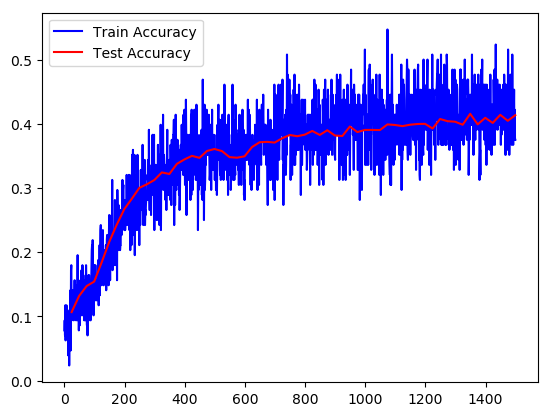

In [168]:
plt.plot(range(1500), train_accuracy, label='Train Accuracy', color="Blue")
plt.plot(range(params["test_step"] - 1, numIters, params["test_step"]), test_accuracy[params["test_step"] - 1:numIters:params["test_step"]], label='Test Accuracy', color="Red")
plt.legend()
plt.show()

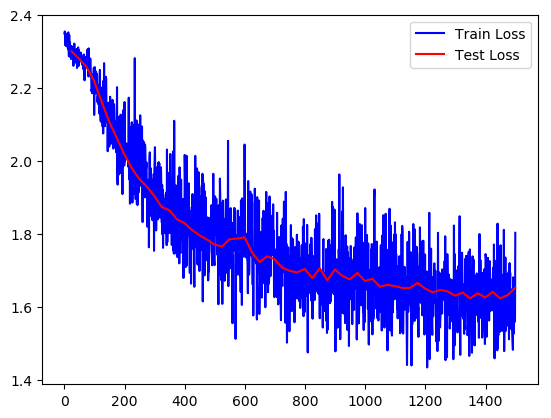

In [171]:
plt.plot(range(1500), train_loss, label='Train Loss', color="Blue")
plt.plot(range(params["test_step"] - 1, numIters, params["test_step"]), test_loss[params["test_step"] - 1:numIters:params["test_step"]], label='Test Loss', color="Red")
plt.legend()
plt.show()

In [172]:
final_test_accuracy, final_test_loss = test(model_result, X_test, y_test)
print("Final Test Accuracy: ", final_test_accuracy, "\tFinal Test Loss: ", final_test_loss)

Final Test Accuracy:  0.4101 	Final Test Loss:  1.671903923023904


# Model 2

## Structure

CONV(2, 3, 2)

POOL(2, 2)

RELU

CONV(2, 2, 6)

POOL(2, 2)

RELU

FLATTEN

LINEAR(294, 10)

SOFTMAX

In [173]:
l2 = [init_layers('conv', {'filter_size': 2,
                        'filter_depth': 3,
                        'num_filters': 2}),
    init_layers('pool', {'filter_size': 2,
                        'stride': 2}),
    init_layers('relu', {}),
    init_layers('conv', {'filter_size': 2,
                        'filter_depth': 2,
                        'num_filters': 6}),
    init_layers('pool', {'filter_size': 2,
                        'stride': 2}),
    init_layers('relu', {}),
    init_layers('flatten', {}),
    init_layers('linear', {'num_in': 294,
                            'num_out': 10}),
    init_layers('softmax', {})]

model2 = init_model(l2, [32, 32, 3], 10, True)

Input size:
[32, 32, 3]
Layer 0 output size: 
(31, 31, 2)
Layer 1 output size: 
(15, 15, 2)
Layer 2 output size: 
(15, 15, 2)
Layer 3 output size: 
(14, 14, 6)
Layer 4 output size: 
(7, 7, 6)
Layer 5 output size: 
(7, 7, 6)
Layer 6 output size: 
(294,)
Layer 7 output size: 
(10,)
Final output size:
(10,)
Provided output size (should match above):
10
(Batch dimension not included)


## Parameters

Learning Rate: 1e-3

Weight Decay: 1e-3

Batch Size: 128

In [174]:
numIters = 1500

params =  {"learning_rate":1e-3,
            "weight_decay":1e-4,
            "batch_size":128,
            "rho":0.99,
            "save_file":'model2_p1.npz',
            "print_step":10,
            "test_step":25}

model_result, train_accuracy, train_loss, test_accuracy, test_loss = train(model2, X_train, y_train, X_test, y_test, params, numIters=numIters)

Iteration:  10 	Train Accuracy:  0.1171875 	Train Loss:  2.3115312817617637
Iteration:  20 	Train Accuracy:  0.09375 	Train Loss:  2.299097608005085
Iteration:  25 	Test Accuracy:  0.1172 	Test Loss:  2.300886139658484
Iteration:  30 	Train Accuracy:  0.0625 	Train Loss:  2.3085532566821843
Iteration:  40 	Train Accuracy:  0.0390625 	Train Loss:  2.305161139660929
Iteration:  50 	Train Accuracy:  0.046875 	Train Loss:  2.3076565840992713
Iteration:  50 	Test Accuracy:  0.1114 	Test Loss:  2.2938363069362997
Iteration:  60 	Train Accuracy:  0.1015625 	Train Loss:  2.302019434542534
Iteration:  70 	Train Accuracy:  0.078125 	Train Loss:  2.291261868616834
Iteration:  75 	Test Accuracy:  0.136 	Test Loss:  2.285695501639793
Iteration:  80 	Train Accuracy:  0.1328125 	Train Loss:  2.28110673820692
Iteration:  90 	Train Accuracy:  0.1640625 	Train Loss:  2.251646362505755
Iteration:  100 	Train Accuracy:  0.203125 	Train Loss:  2.249791973673899
Iteration:  100 	Test Accuracy:  0.1411 	Test

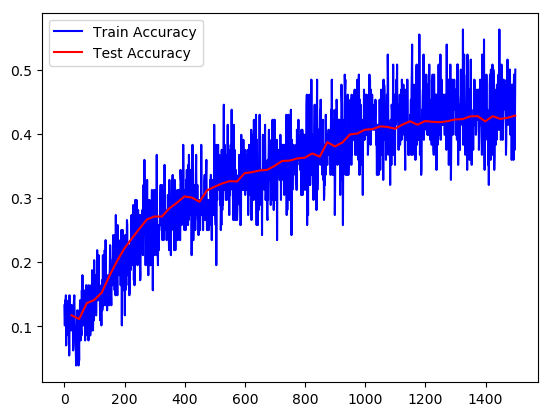

In [175]:
plt.plot(range(numIters), train_accuracy, label='Train Accuracy', color="Blue")
plt.plot(range(params["test_step"] - 1, numIters, params["test_step"]), test_accuracy[params["test_step"] - 1:numIters:params["test_step"]], label='Test Accuracy', color="Red")
plt.legend()
plt.show()

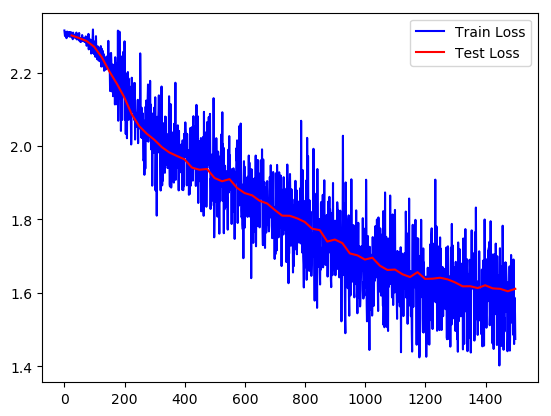

In [177]:
plt.plot(range(numIters), train_loss, label='Train Loss', color="Blue")
plt.plot(range(params["test_step"] - 1, numIters, params["test_step"]), test_loss[params["test_step"] - 1:numIters:params["test_step"]], label='Test Loss', color="Red")
plt.legend()
plt.show()

In [178]:
final_test_accuracy, final_test_loss = test(model_result, X_test, y_test)
print("Final Test Accuracy: ", final_test_accuracy, "\tFinal Test Loss: ", final_test_loss)

Final Test Accuracy:  0.4286 	Final Test Loss:  1.6101523633137025
